<a href="https://colab.research.google.com/github/Visheuleer/analise-enem2016/blob/main/Analise_Enem2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


#**Análise Exploratória Enem 2016**

---



## **Objetivo do projeto**

Nesse projeto irei analisar os dados do enem 2016. Meus objetivos são responder essas perguntas:

1.   Analisar algumas questões sociais que foram feitas para os candidatos.
2.   Existe uma desigualdade nas notas por renda familiar? 
3.   Quais grupos socias (etnias e classes financeiras) tem as melhores notas?
4.   Ter internet influencia na nota?
5.   Refletir sobre o resultado da análise


##**Importação de bibliotecas e dataset**

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://github.com/Visheuleer/analise-enem2016/blob/main/database-enem2016.csv?raw=true')

In [280]:
plt.style.use('seaborn-colorblind')


## **Selecionando e estudando os dados**

In [281]:
#Explorando o tamanho de linhas e colunas do dataset
print('Linhas {}, Colunas {}'.format(df.shape[0], df.shape[1]))

Linhas 13730, Colunas 167


In [282]:
#Verificando quais os dados temos nas colunas
df.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

Primeiro ponto que preciso esclarecer, o INEP disponibiliza um dicionário sobre o que essas colunas significam, você pode baixar [aqui](https://www.mediafire.com/file/a5lde6txvddga9p/Dicionrio_Microdados_Enem_2016.ods/file). Isso é só para caso você queira uma explicação mais detalhada de todas, mas eu vou deixar bem clara as colunas que vou analisar nesse projeto.

In [283]:
#Selecionando os dados que iremos analisar
df_enem = df[['SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','NU_NOTA_MT','NU_NOTA_CH','Q025',
         'Q006','Q002', 'Q050']]
#Explorando o tamanho da nossa seleção
print('Linhas {}, Colunas {}'.format(df_enem.shape[0], df_enem.shape[1]))

Linhas 13730, Colunas 10


In [284]:
#Visualizando uma parte do dataset que selecionamos
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_MT,NU_NOTA_CH,Q025,Q006,Q002,Q050
0,RS,24,M,1,399.4,495.4,A,C,D,D
1,CE,17,F,3,459.8,544.1,A,B,A,A
2,CE,21,F,3,NaN,NaN,A,C,D,A
3,RJ,25,F,0,NaN,NaN,B,E,E,A
4,AM,28,M,2,NaN,NaN,A,C,D,A


## **Tratando variáveis qualitativas**

In [285]:
#Vendo quantos tipos de raças(etnias) temos no dataset
df_enem['TP_COR_RACA'].unique()

array([1, 3, 0, 2, 4, 5])

Aqui entra o dicionário do INEP sobre esses dados. Ele nos informa que os números e qual etnia eles representam.


1.   Branca
2.   Preta
3.   Parda
4.   Amarela
5.   Indígina

Mas e o 0, e o 6? Eles são dados em que não temos a informação.



In [286]:
#Mudando os valores para facilitar a análise.
df_enem['TP_COR_RACA'] = df_enem['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [287]:
#Verificando se os valores mudaram
df_enem['TP_COR_RACA'].unique()

array(['Branca', 'Parda', 'NA', 'Preta', 'Amarela', 'Indígena'],
      dtype=object)

Agora, vamos tratar as respostas das questões. Onde novamente, o dicionário do INEP nos diz qual era a pergunta de determinada questão e o que eram as respostas. Mas não se preocupe, irei deixar você ciente de qual é a pergunta que estamos analisando.

In [288]:
#Escolaridade da mãe?
df_enem['Q002'] = df_enem['Q002'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF', 'D':'Não completou EM', 'F': 'Graduada', 'G':'Pós-graduada', 'H': 'Não sabe'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Se você está acompanhando o dicionário deve ter notado que a B e a C diferem do que eu coloquei ali. Fiz isso de proposito, pois quero analisar de uma forma mais generalista, sabendo se a mãe do candidato terminou o ensino fundamental ou não.

In [289]:
#Verificando se os valores mudaram
df_enem['Q002'].unique()

array(['Não completou EM', 'Nunca estudou', nan, 'Graduada',
       'Não completou EF', 'Pós-graduada', 'Não sabe'], dtype=object)

In [290]:
#Possui internet em casa?
df_enem['Q025'] = df_enem['Q025'].map({'A':'Não', 'B':'Sim'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [291]:
#Verificando se os valores mudaram
df_enem['Q025'].unique()

array(['Não', 'Sim'], dtype=object)

In [292]:
#Durante o Ensino Médio, o candidato abandonou os estudos por algum tempo e/ou foi reprovado?
df_enem['Q050'] = df_enem['Q050'].map({'A':'Não abandonou nem foi reprovado', 'B':'Não abandonou e foi reprovado', 'C':'Abandonou e não foi reprovado', 'D':'Abandonou e foi reprovado'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [293]:
#Verificando se os valores mudaram
df_enem['Q050'].unique()

array(['Abandonou e foi reprovado', 'Não abandonou nem foi reprovado',
       'Abandonou e não foi reprovado', 'Não abandonou e foi reprovado'],
      dtype=object)

In [294]:
#Renda familiar (somando com a renda do candidato se tiver)
df_enem['Q006'] = df_enem['Q006'].map({'A':'Nenhuma renda', 'B':'Até 1.320', 'C':'Até 1.320', 'D':'Até 3.520', 'E':'Até 3.520', 'F':'Até 3.520', 'G':'Até 3.520', 'H':'Até 10.560','I':'Até 10.560', 'J':'Até 10.560','K':'Até 10.560', 'L':'Até 10.560','M':'Até 10.560','N':'Até 10.560', 'O':'Mais de 10.560','P':'Mais de 10.560','Q':'Mais de 10.560'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [295]:
#Verificando se os valores mudaram
df_enem['Q006'].unique()

array(['Até 1.320', 'Até 3.520', 'Até 10.560', 'Nenhuma renda',
       'Mais de 10.560'], dtype=object)

## **Analisando dados dos canditatos**

A primeira coisa que quero verificar é qual a porcentagem de etnias que participaram do enem 2016. 

In [296]:
#Verificando porcentagem de candidatos de cada etnia
df_enem['TP_COR_RACA'].value_counts()/df_enem.shape[0]*100

Parda       48.747269
Branca      33.423161
Preta       13.066278
Amarela      2.272396
NA           1.755280
Indígena     0.735615
Name: TP_COR_RACA, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


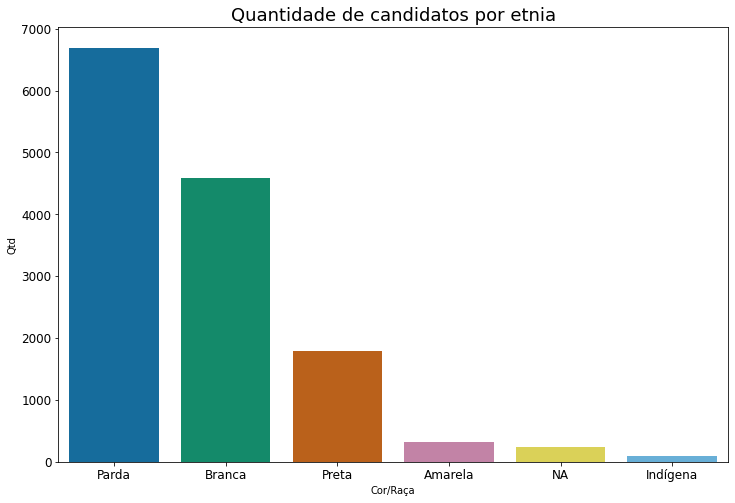

In [297]:
#Montando gráfico da quantidade de canditatos de cada etnia
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)
plt.figure(figsize=(12, 8))
ordem = df_enem['TP_COR_RACA'].value_counts().index[:6]
ax = sns.countplot(df_enem['TP_COR_RACA'], order=ordem)
ax.set_title('Quantidade de candidatos por etnia')
plt.xlabel('Cor/Raça')
plt.ylabel("Qtd")
plt.show()

Um ponto importante já se apresenta por aqui. Existe uma diferença enorme entre o número de indígenas e amarelos com as demais etnias. Segundo o IBGE, apenas 1,1% da população brasileira se declara como Indígena ou amarela. Minha hipotése é que essa desigualdade em números de candidatos seja fruto da quantidade de pessoas que há no Brasil dessas etnias. 

Fonte: https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html#:~:text=De%20acordo%20com%20dados%20da,1%25%20como%20amarelos%20ou%20ind%C3%ADgenas.

In [298]:
#Verificando porcentagem de homens e mulheres que prestaram o Enem 2016
df_enem['TP_SEXO'].value_counts()/df_enem.shape[0]*100

F    61.84268
M    38.15732
Name: TP_SEXO, dtype: float64

Agora vamos dividir os canditatos por sexo e ver quantas pessoas por sexo temos nas etnias.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


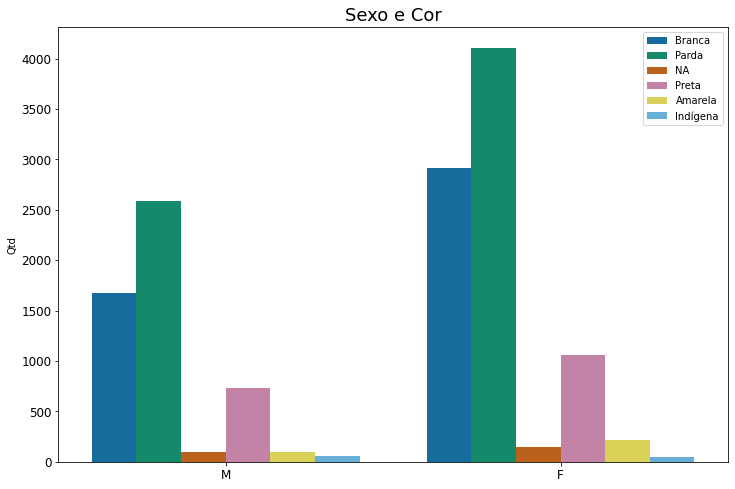

In [299]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(df_enem['TP_SEXO'],hue=df_enem['TP_COR_RACA'], dodge=True)
ax.set_title('Sexo e Cor')
plt.xlabel('')
plt.ylabel('Qtd')
plt.legend(loc='best')
plt.show()

In [300]:
#Porcentagem da renda dos canditatos 
df_enem['Q006'].value_counts()/df_enem.shape[0]*100

Até 1.320         57.574654
Até 3.520         28.936635
Até 10.560         8.455936
Nenhuma renda      3.576111
Mais de 10.560     1.456664
Name: Q006, dtype: float64

Mais da metade da família dos vestibulandos do enem 2016 recebem até 1.320 reias.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


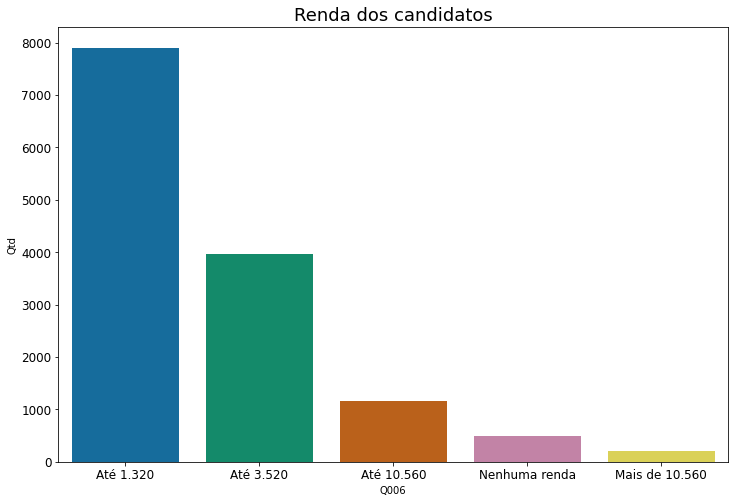

In [301]:
#Verificando renda dos canditatos 
plt.figure(figsize=(12,8))
ax = sns.countplot(df_enem['Q006'])
ax.set_title('Renda dos candidatos')
plt.ylabel('Qtd')
plt.show()

Esse gráfico nos mostra um ponto muito interessante de se observar: Existem mais famílias sem nenhuma renda do que famílias com renda superior a 10.560 reais.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


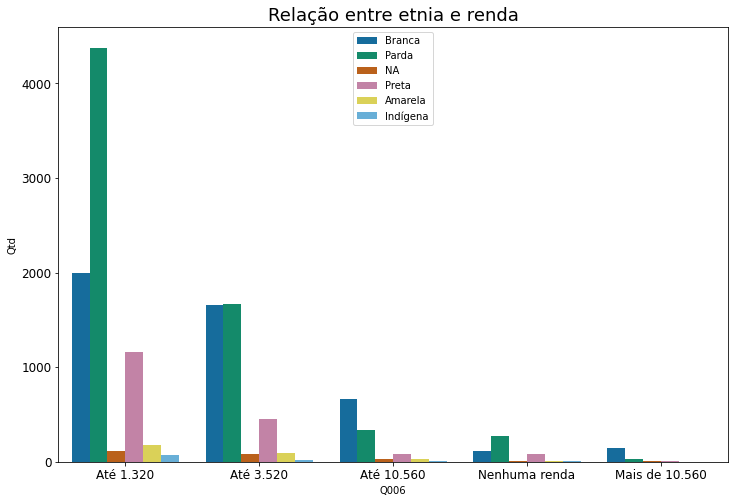

In [302]:
#Verificando renda por etnia
plt.figure(figsize=(12,8))
ax = sns.countplot(df_enem['Q006'], hue=df_enem['TP_COR_RACA'],dodge=True)
ax.set_title('Relação entre etnia e renda')
plt.ylabel('Qtd')
plt.legend(loc='best')
plt.show()

Nesse gráfico podemos observar uma desigualdade grande na renda entre as etnias. O branco em média recebe bem mais que o pardo, preto, indígena e amarelo. Isso é fruto de uma desigualdade étnica que já conhecemos de longa data. 

Segundo o IBGE, em 2018 32,9% das pessoas negras no Brasil estavam abaixo da linha da pobreza contra 15,4%  de pessoas brancas.

Fonte: https://biblioteca.ibge.gov.br/visualizacao/livros/liv101681_informativo.pdf

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


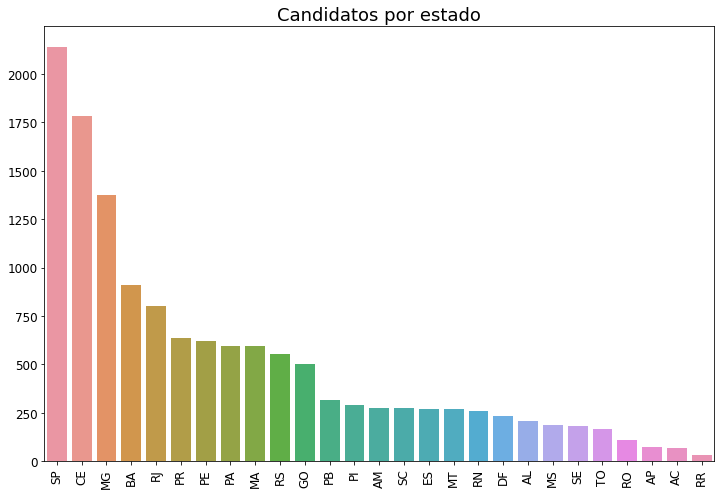

In [303]:
#Verificando quantos candidatos prestaram o enem 2016 por região
ordem = df_enem['SG_UF_RESIDENCIA'].value_counts().index[:27]
plt.figure(figsize=(12,8))
ax = sns.countplot(df_enem['SG_UF_RESIDENCIA'], order=ordem)
ax.set_title('Candidatos por estado')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [304]:
#Possui internet em casa?
df_enem['Q025'].value_counts()/df_enem.shape[0]*100

Sim    56.919155
Não    43.080845
Name: Q025, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


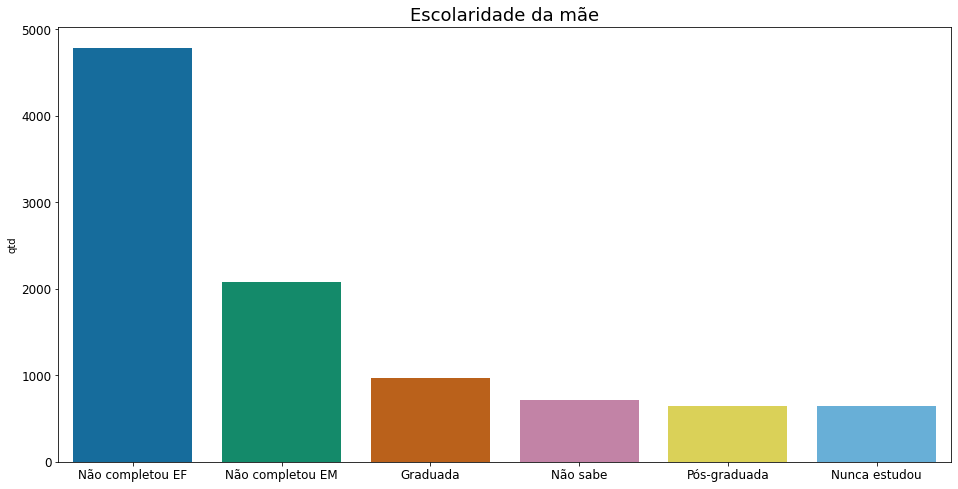

In [305]:
#Escolaridade da mãe dos candidatos 
plt.figure(figsize=(16,8))
ordem = df_enem['Q002'].value_counts().index[:6]
ax = sns.countplot(df_enem['Q002'], order=ordem)
ax.set_title('Escolaridade da mãe')
plt.xlabel('')
plt.ylabel('qtd')
plt.show()

Duas observações interessantes aqui: A maior parte da mãe dos participantes do Enem 2016 não completou o fundamental. Já a quantidade de mães pós graduadas é praticamente a mesma das que nunca estudaram.

# Analisando as notas e idades

In [306]:
df_enem.describe()

,NU_IDADE,NU_NOTA_MT,NU_NOTA_CH
count,13730.000000,10133.000000,10341.000000
mean,21.593809,482.497928,529.661087
std,7.043654,99.826323,73.726344
min,13.000000,0.000000,0.000000
25%,17.000000,408.900000,480.400000
50%,19.000000,461.200000,532.000000
75%,23.000000,537.600000,581.200000
max,67.000000,952.000000,807.000000


Se observamos, a pessoa mais velha que realizou a prova tem 67 anos, o que é de fato muito interessante de ver. Fica a dica, nunca é tarde para aprender :) Vamos montar um gráfico para fazermos outras observações


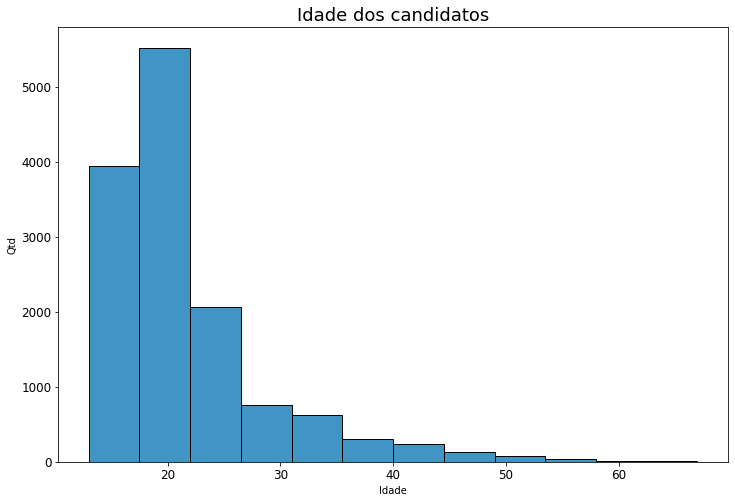

In [307]:
#Montando gráfico para sabermos em qual intervalo de idade temos mais participantes.
plt.figure(figsize=(12,8))
ax = sns.histplot(data=df_enem, x = df['NU_IDADE'], bins=12)
plt.xlabel('Idade')
plt.ylabel('Qtd')
ax.set_title('Idade dos candidatos')
plt.show()

Como esperado, a maior parte dos participantes estão entre 17 e 20, que é mais ou menos a idade que as pessoas terminam o ensino médio.

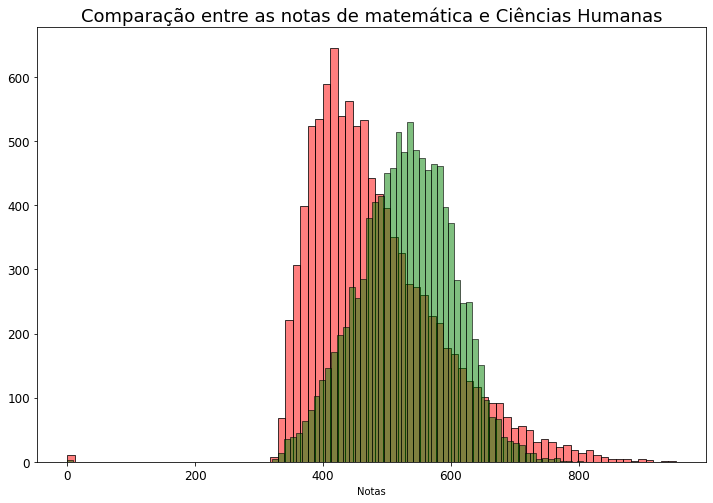

In [308]:
#Comparando notas de matemática e ciências humanas
plt.figure(figsize=(12,8))
ax = sns.histplot(data=df_enem, x = df['NU_NOTA_MT'], alpha = .5, color='red')
ay = sns.histplot(data=df_enem, x = df['NU_NOTA_CH'], alpha = .5, color ='green')
plt.xlabel('Notas')
plt.ylabel('')
ax.set_title('Comparação entre as notas de matemática e Ciências Humanas')
plt.show()


Uma observação que podemos fazer é que a média das notas de matématica é menor do que a de ciências humanas, mas a nota máxima em matématica é maior do que a de ciências humanas.

Outra informação importante é que houve provas zeradas em ambas as provas, mas a quantidade de 0 em matemática é ligeiramente maior.

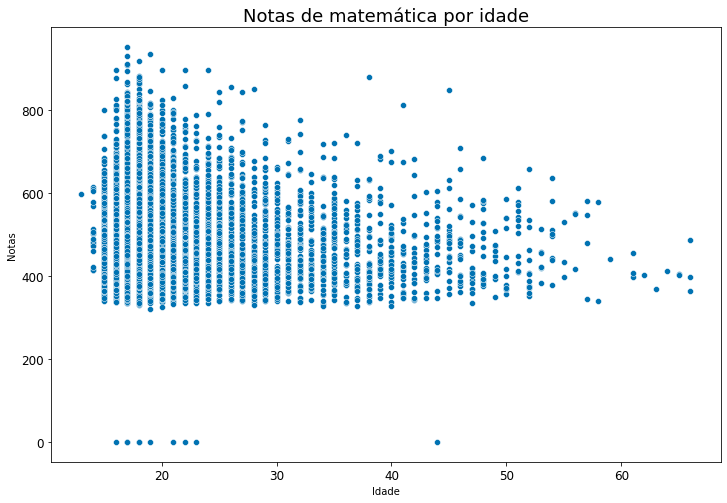

In [309]:
#Montando gráfico para visualizar notas por idade
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df_enem, x= 'NU_IDADE', y = 'NU_NOTA_MT')
ax.set_title('Notas de matemática por idade')

plt.xlabel('Idade')
plt.ylabel('Notas')
plt.show()

Nesse gráfico eu notei duas coisas: As maiores notas estão mais ou menos dos 17 anos aos 22 anos.

A segunda observação é que notei um certo padrão. Quanto mais idade, as notas parecem ir diminuindo. Vamos montar outro gráfico para ver se minha hipotése está correta ou não.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


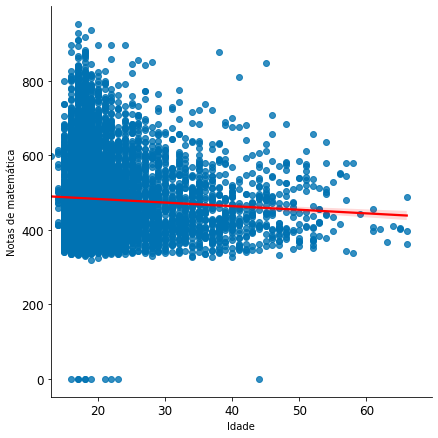

In [310]:
sns.lmplot(data=df_enem, x='NU_IDADE', y='NU_NOTA_MT', line_kws={'color':'red'}, size=6)
plt.xlabel('Idade')
plt.ylabel('Notas de matemática')
plt.show()

Podemos observar que a linha está inclinada de esquerda para direita, o que confirma minha hipotése de que, quanto maior a idade, as notas diminuem 




**AVISO IMPORTANTE**

 Apesar dos números estarem correlacionados, isso **NÃO** quer dizer que existe causalidade. Ou seja, não podemos afirmar que **porque** uma pessoa fica mais velha, a nota dela cai
 
 <img src='https://miro.medium.com/max/4160/1*6xheQbkHn38R6zbzTUq4wA.png'><img>
 Exemplo: Esse gráfico tirado do site: http://www.tylervigen.com/spurious-correlations mostra a correlação entre o número de pessoas que se afogaram na piscina e o número de filmes em que o Nicolas Cage aparece. 
 
 Sabemos que esses números estão correlacionados, mas não tem efeito de causalidade, pois, não é porque uma pessoa se afoga que o Nicolas Cage participa de um filme.

Aqui fica uma indicação da explicação dos conceitos: https://www.youtube.com/watch?v=l4Byu2Dym2A

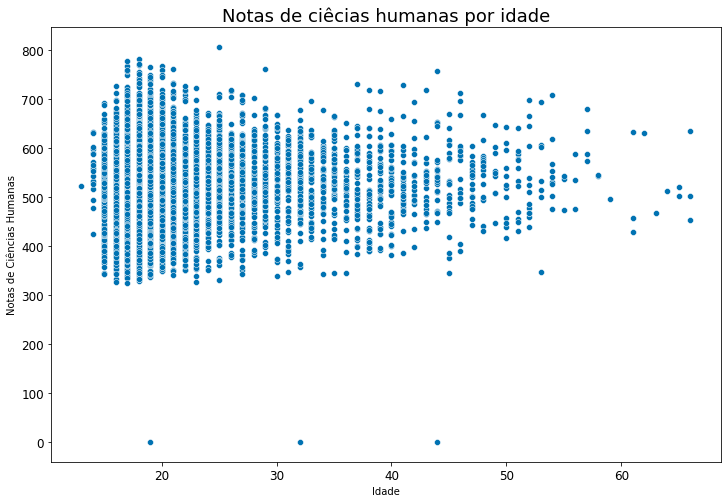

In [311]:
#Montando gráfico para visualizar notas por idade
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df_enem, x= 'NU_IDADE', y = 'NU_NOTA_CH')
ax.set_title('Notas de ciêcias humanas por idade')

plt.xlabel('Idade')
plt.ylabel('Notas de Ciências Humanas')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


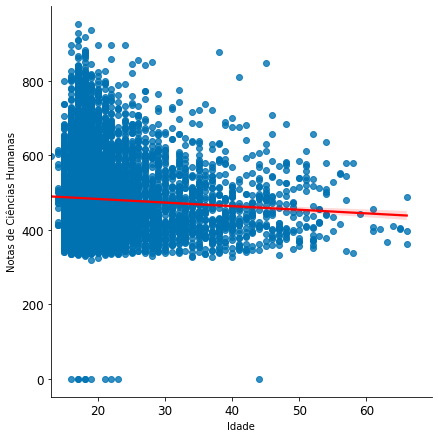

In [312]:
sns.lmplot(data=df_enem, x='NU_IDADE', y='NU_NOTA_MT', line_kws={'color':'red'}, size=6)
plt.xlabel('Idade')
plt.ylabel('Notas de Ciências Humanas')
plt.show()

Podemos observar no gráfico que temos a mesma correlação que citei anteriormente na prova de ciências humanas

## **Cruzando as notas com dados sociais**

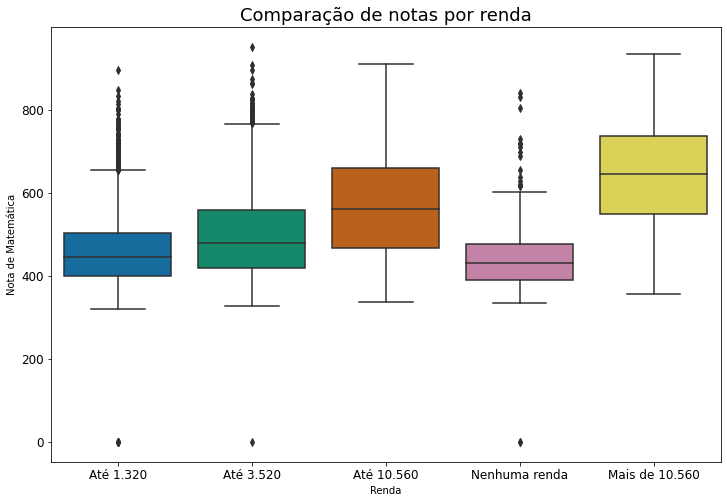

In [313]:
#Montando gráfico para comparar as notas por renda
plt.figure(figsize=(12,8))
ax = sns.boxplot(x=df_enem['Q006'], y=df_enem['NU_NOTA_MT'])
ax.set_title('Comparação de notas por renda')
plt.xlabel('Renda')
plt.ylabel('Nota de Matemática')
plt.show()

Esse gráfico mostra que claramente existe uma relação entre o aumento da renda e o aumento da nota de matemática

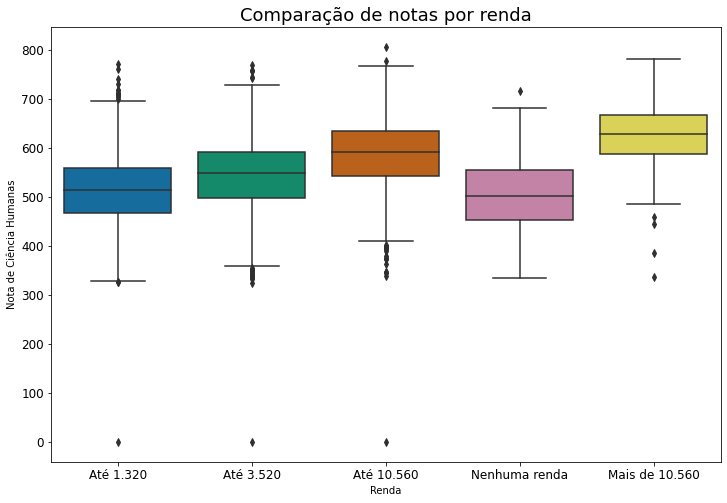

In [314]:
#Montando gráfico para comparar as notas por renda
plt.figure(figsize=(12,8))
ax = sns.boxplot(x=df_enem['Q006'], y=df_enem['NU_NOTA_CH'])
ax.set_title('Comparação de notas por renda')
plt.xlabel('Renda')
plt.ylabel('Nota de Ciência Humanas')
plt.show()

Mais uma vez o gráfico mostra que existe uma relação muito forte entre o aumento da renda e o aumento da nota em ciências humanas. 

Outro ponto interessante é que as notas em ciências humanas das pessoas com renda até 1.320 são maiores que as notas de matemática. 


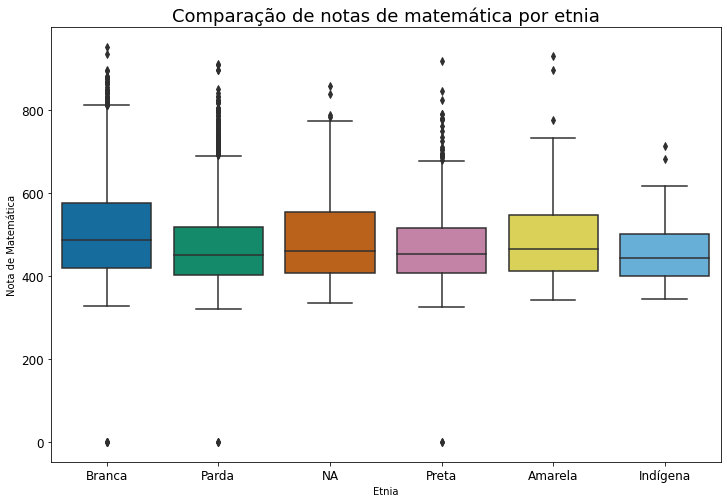

In [315]:
#Montando gráfico para comparar as notas por etnia
plt.figure(figsize=(12,8))
ax = sns.boxplot(x=df_enem['TP_COR_RACA'], y=df_enem['NU_NOTA_MT'])
ax.set_title('Comparação de notas de matemática por etnia')
plt.xlabel('Etnia')
plt.ylabel('Nota de Matemática')
plt.show()

Alguns pontos aqui: Os amarelos tiveram notas de matemática maiores do que pardos e pretos, já os indígenas tiveram notas ligeralmente inferiores do que os pretos e pardos. 

Os brancos tem as melhores notas, o que pode estar associado com o que vimos anteriormente, pois as maiores rendas são de pessoas brancas.

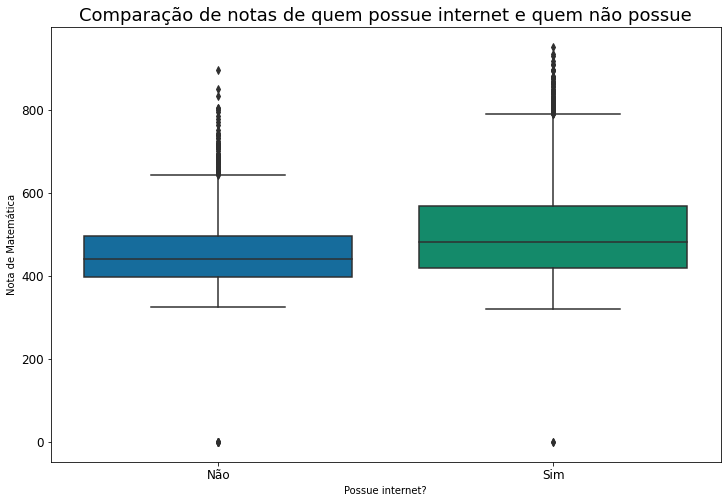

In [316]:
#Montando gráfico para comparar as notas de quem tem internet e quem não tem
plt.figure(figsize=(12,8))
ax = sns.boxplot(x=df_enem['Q025'], y=df_enem['NU_NOTA_MT'])
ax.set_title('Comparação de notas de quem possue internet e quem não possue')
plt.xlabel('Possue internet?')
plt.ylabel('Nota de Matemática')
plt.show()

Podemos ver por esse gráfico que quem possue internet tem notas superiores.

## **Conclusões**

Respondendo nossos objetivos:


1.   Analisar algumas questões sociais que foram feitas para os candidatos.

        Analisamos as questões logo no início da análise. Sessão **"analisando dados dos candidatos"**

2.   Existe uma desigualdade nas notas por renda familiar?

     Sim. Vimos na seção **"Cruzando as notas com dados sociais"** que existe uma relação muito forte entre o aumento da renda e o aumento da nota de ambas as provas.

3.   Quais grupos socias (etnias e classes financeiras) tem as melhores notas?

      Brancos e pessoas com renda de mais de 10.560 reais.

4.   Ter internet influencia na nota?

      Sim. Vimos na seção **"Cruzando as notas com dados sociais"** que quem tem internet tira notas melhores do que quem não tem.

5.   Refletir sobre os resultados da análise

      Acho que fica aqui a importância do debate sobre a desigualdade social e a meritocracia. Na ánalise é possível ver uma forte indicação de que as camadas mais pobres não partem do mesmo ponto do que as camadas mais ricas. 
      
      Outro ponto que merece ser destacado foi a renda dos grupos étnicos que destaquei no ínicio da ánalise, no gráfico nós vimos que os grupos étnicos estão fortemente ligados a renda familiar, onde indígenas, pretos, pardos e amarelos possuem menos renda do que brancos.

      Bom, com essa reflexão sobre democratização da educação e desigualdade social eu finalizo por aqui a minha análise do Enem 2016. Obrigado a quem leu até aqui!

